# Метрики

✍Итак, подбирать оптимальное количество кластеров мы научились. Но как оценить, насколько хорошие кластеры у нас получились?

Допустим, мы разделили кошек и собак на два кластера: в каждом из кластеров находятся либо только кошки, либо только собаки. Но может получиться так, что в ходе кластеризации мы разделим одинаковых собак по разным кластерам или кошки с собаками перемешаются, как на рисунке ниже:

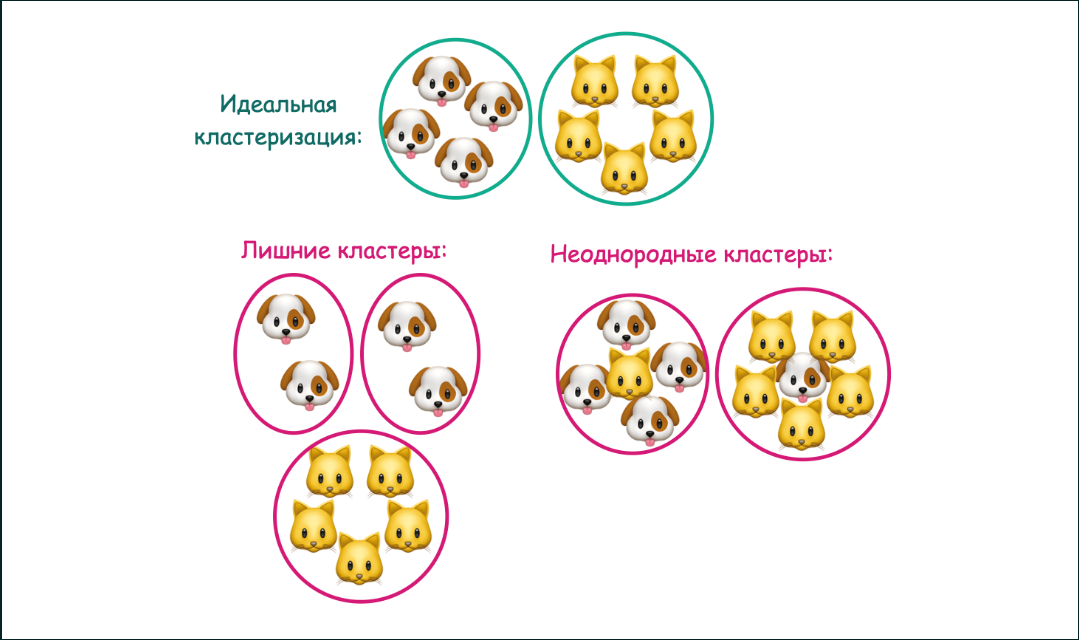

Поэтому было бы хорошо как-то оценивать, не создали ли мы лишние кластеры или одинаковые ли объекты в нашем кластере. В этом нам помогут метрики, которые мы рассмотрим далее.

Чтобы понять, правильно ли объекты распределились по кластерам, необходимо знать, в каких кластерах должны быть объекты.

> Ранее мы говорили, что кластеризация относится к методу машинного обучения без учителя и применяется, когда нет размеченных данных, а значит мы не знаем правильных ответов. Однако иногда размеченные данные всё же есть. В таком случае мы можем провести дополнительный анализ получившихся кластеров.

Существует ряд метрик, которые можно подсчитать, **если данные размечены.** Мы рассмотрим четыре метрики, которые больше всего помогут нам при анализе результатов кластеризации:

### 1. Однородность кластеров (homogeneity score)

> Данная метрика, как и три последующих, может применяться, **только** когда есть размеченные данные.

> Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.



#### Формула (для любознательных)

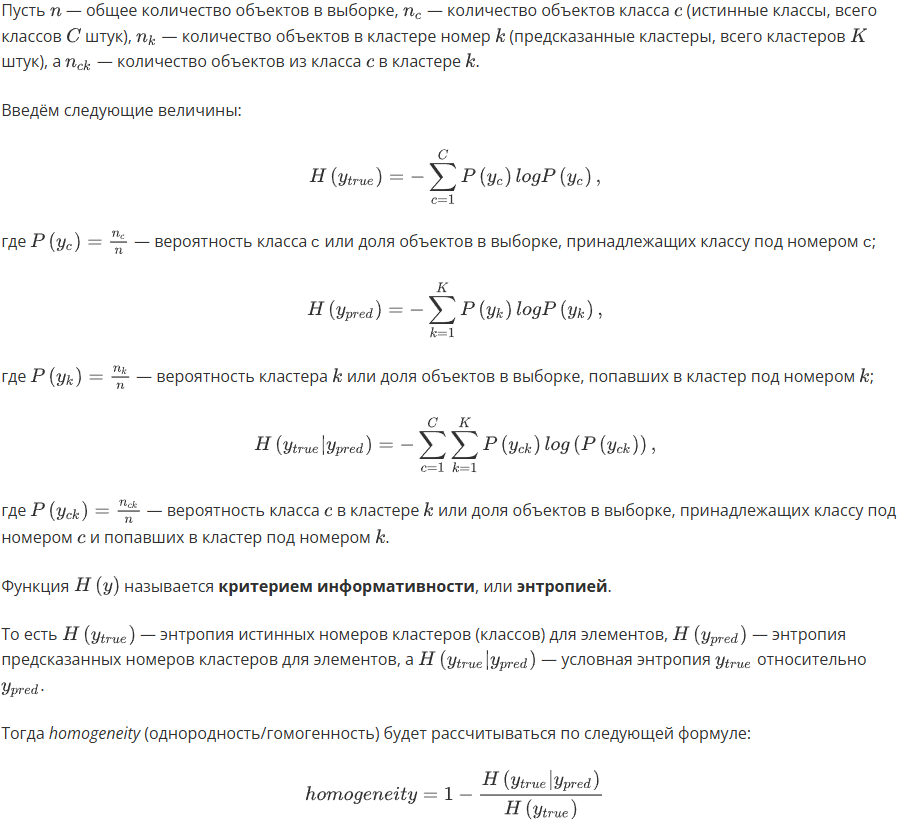

Например, нам нужно распределить кошек и собак по разным кластерам. В первом случае нам это удалось, а во втором одна собака «убежала» к кошкам, одна кошка — к собакам, и животные перемешались:

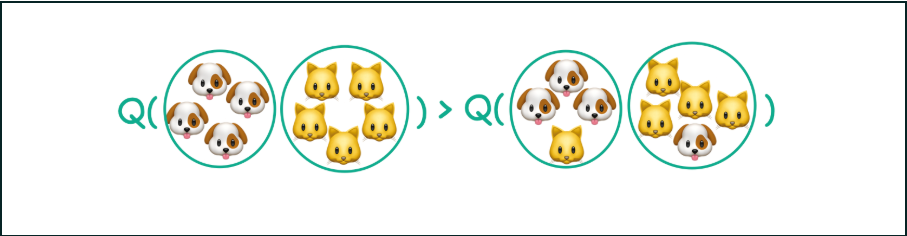

Таким образом, во втором случае в кластере оказались разные животные, поэтому однородность снизилась.

> В первом кластере метрика однородности будет максимальной и равна 1, во втором значение однородности будет меньше, так как животные немного перемешались. Если бы кластер был максимально неоднородный, значение метрики было бы равно 0.

Теперь посмотрим, как рассчитать метрику однородности в *sklearn*. Рассмотрим два случая комбинаций ответов модели и истинных кластеров объектов. В первом случае ответы модели будут полностью совпадать с истинными ответами, а во втором будут полностью противоположны им:

In [ ]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))


1.0
0.0


Во втором случае мы получаем метрику, равную 1, хотя предсказывали совершенно противоположный результат. Почему так получилось?

Допустим, наши 0 и 1 — это номера кластеров, в которых находятся кошки и собаки:

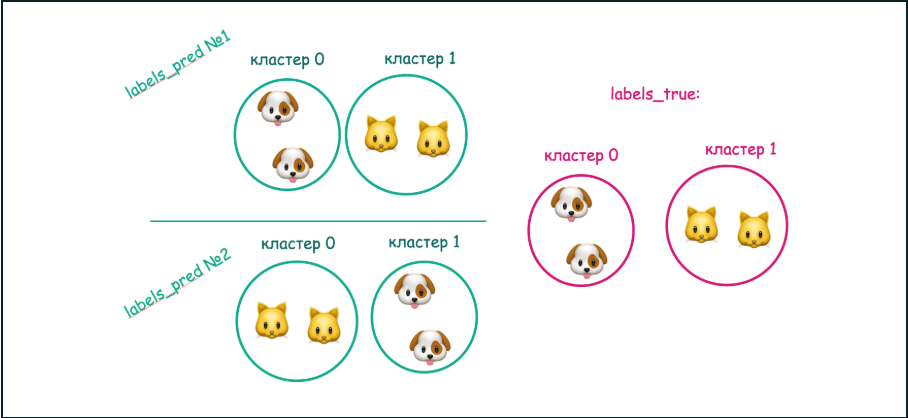

*labels_true* — это реальные значения: в кластере 0 — собаки, в кластере 1 — кошки. В первый раз мы предсказали, что в кластере 0 находятся две собаки, а в кластере 1 — две кошки. Метрика однородности равна 1, так как внутри кластеров разные объекты и наши ответы полностью совпали с labels_true.

Во втором случае, казалось бы, будет неверно, если в кластере 0 будут кошки, а в кластере 1 — собаки. Но, судя по составу кластеров, кошки и собаки не перемешались, поэтому однородность кластеров будет равна 1.

Рассмотрим метрику однородности на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

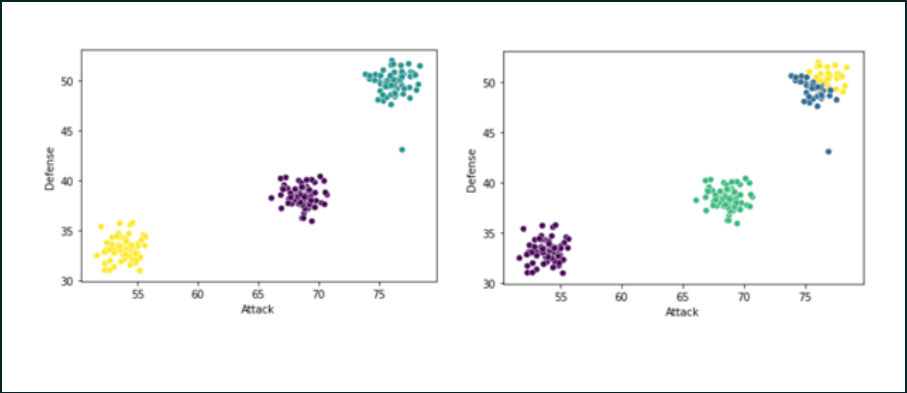

In [12]:
import pandas as pd
df = pd.read_csv('data/pokemon.csv')
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1
...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1


In [ ]:
df = pd.read_csv('data/pokemon.csv')
# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

AttributeError: 'DataFrame' object has no attribute 'Clusters_k3'

Вы можете удивиться, что во втором случае метрика равна 1, но это нормально: хоть мы и разделили данные на большее количество кластеров, внутри кластеров данные остались однородными.

### 2. Полнота кластера (completeness score)

> Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше:

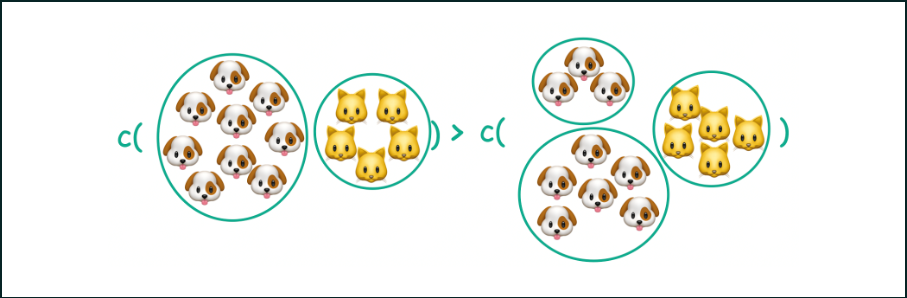

На рисунке выше c — это completeness, или полнота.

#### Формула (для любознательных)

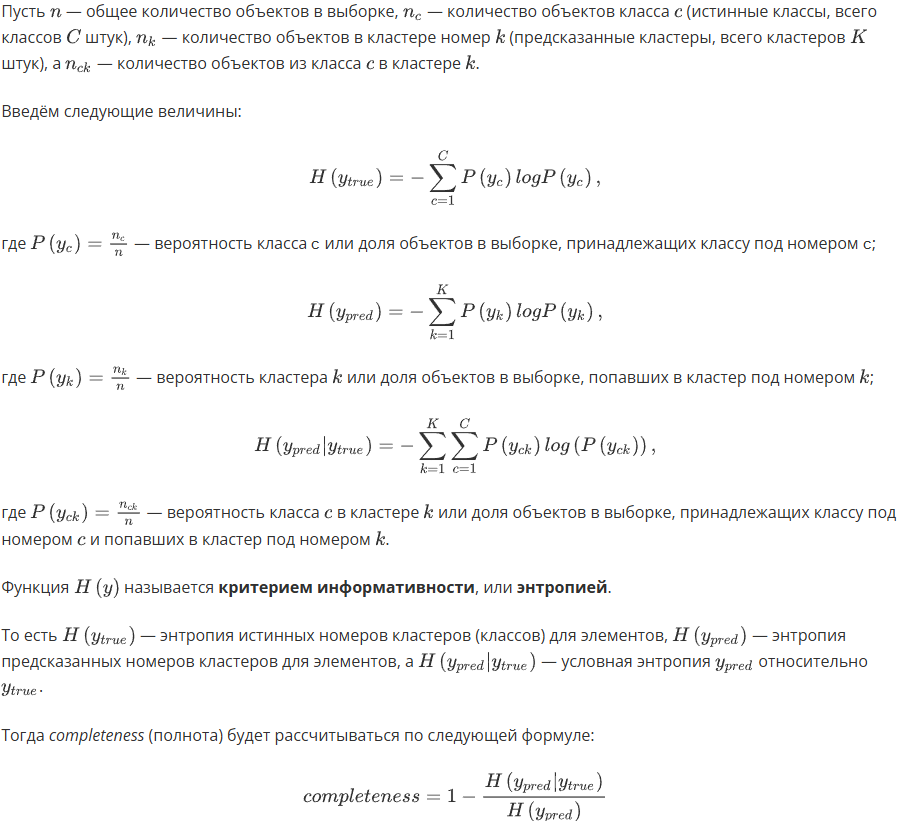

При максимальном заполнении кластеров схожими объектами полнота равняется 1 (когда есть один большой кластер со всеми собаками), при минимальном заполнении — 0.

In [13]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])
1.0

1.0

Рассмотрим метрику полноты на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

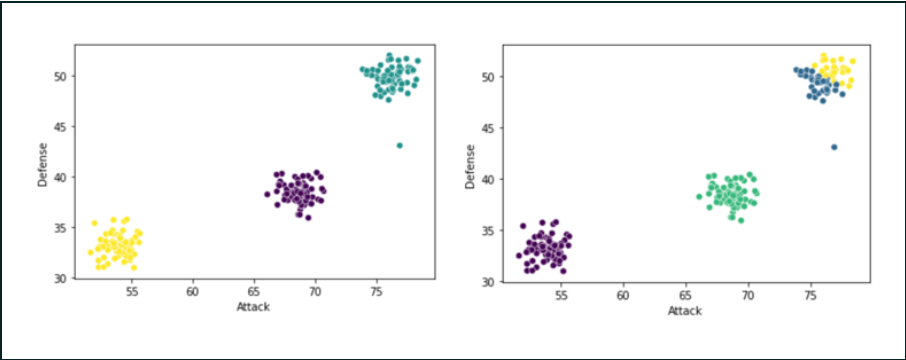

In [ ]:
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
> 1.0
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
> 0.829867483307009

AttributeError: 'DataFrame' object has no attribute 'Clusters_k3'

Во втором случае третий кластер оказался неполным, так как предсказано, что половина объектов принадлежит к третьему кластеру, а другая половина — к четвёртому. Однако два других кластера предсказаны правильно, поэтому метрика полноты меньше 1, но всё же её значение не такое низкое.

### 3. V-мера (V-Measure)

Эта метрика — комбинация метрик полноты и однородности.

> Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

V-мера рассчитывается по формуле:

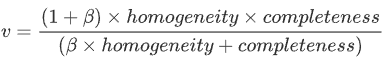

По умолчанию  , но это значение можно варьировать, если хочется дать разный вес разным свойствам.

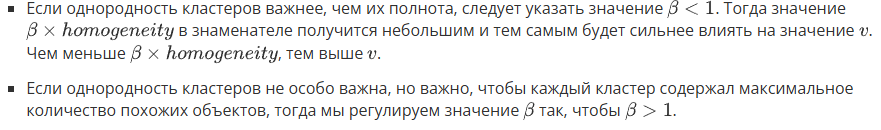

Данную метрику можно сравнить с метрикой [F-меры](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/jump_to_id/cd2452fe27f3423dbace36790066b077#f1_measure), которую вы изучили, когда проходили метрики для оценки моделей классификации. F-мера рассчитывается следующим образом:

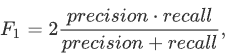

где *precision* показывает точность, а *recall* — полноту.

При стандартном расчёте V-меры ***β*** равна 1:

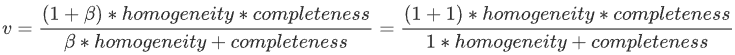

Получается такая же формула, как и при расчёте *F-меры.*

> Метрику однородности кластера при кластеризации можно сравнить с метрикой precision из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика recall из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

> Данную метрику можно вычислять, когда одновременно важны и наполненность кластеров, и их однородность.

Допустим, мы разделили данные следующим образом:

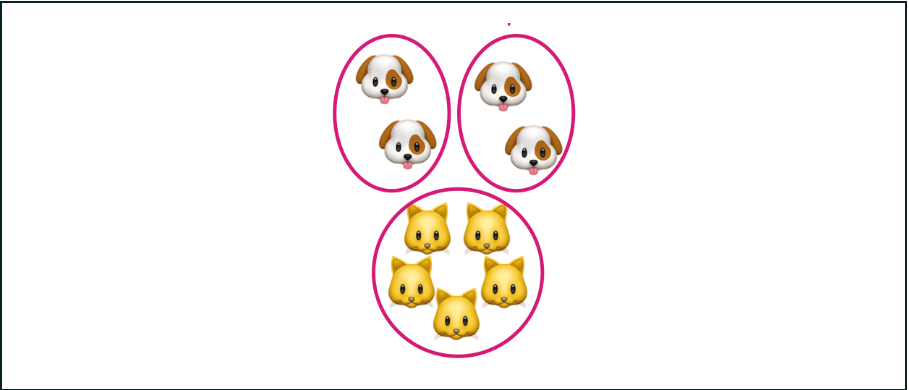

Если бы мы считали метрику однородности кластеров, то она была бы равна 1, так как кластеры однородны и собаки и кошки внутри них не перемешаны. Но очевидно, что кластеризация неидеальна: вместо одного кластера с собаками у нас целых два. Поэтому если бы мы неправильно выбрали метрику (считали бы однородность) для определения качества кластеризации, то сделали бы неверные выводы. Но если мы будем считать V-меру, то будем одновременно учитывать оба фактора (полноту и однородность кластеров). Если же какой-то из факторов для нас важнее, мы можем изменять значение ***β***, придавая больший вес однородности кластера или полноте.

Посчитаем V-меру для двух случаев кластеризации датасета с покемонами:

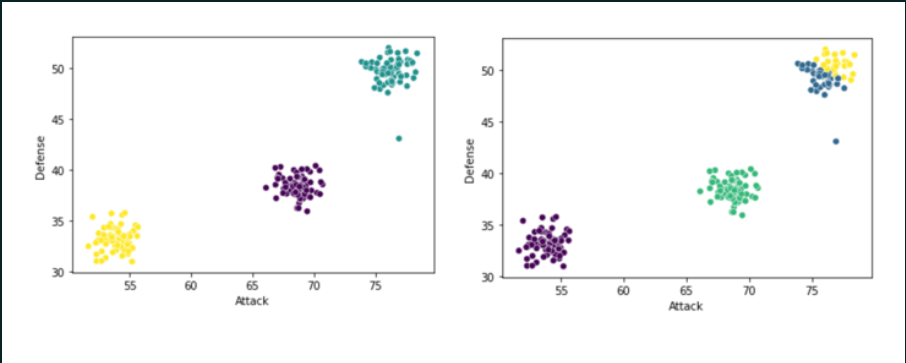

In [ ]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
>1.0

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
>0.9070246789753754

В первом случае и полнота, и однородность кластеров были равны 1, поэтому V-мера, основанная на этих двух метриках, получила максимальное значение (1). Во втором случае полнота кластеризации была равна 0.83, так как один из кластеров был наполнен наполовину. Этот факт отразился и на значении V-меры, но, так как однородность кластеров имела максимальное значение,V-мера приняла значение 0.9.

### 4. Индекс Рэнда

> Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.

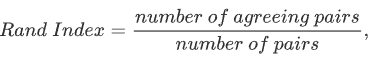

где *number of pairs* — общее количество пар, *number of agreeing pairs* — количество пар, для которых предсказание и истинные значения совпали.

По сути, данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер.

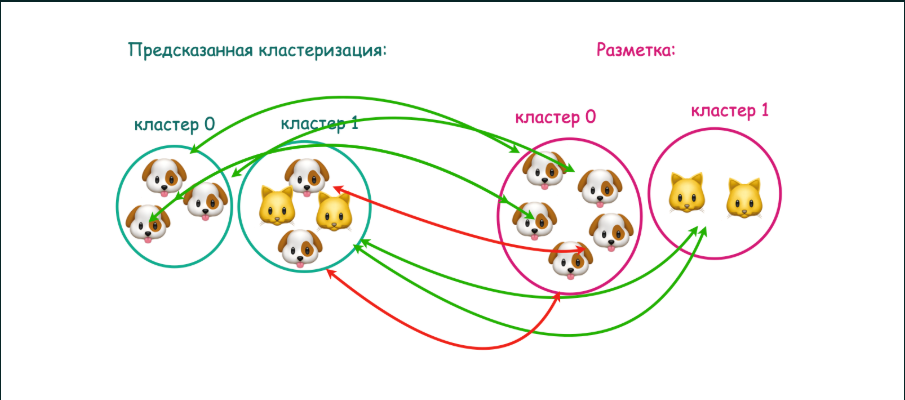

Запустим подсчёт индекса Рэнда в *sklearn:*

In [22]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([1, 0, 0, 1], [0, 0, 1, 1])

np.float64(0.3333333333333333)

В данном случае мы получили индекс Рэнда, равный 1. Это означает, что все объекты в предсказанном кластере попали в те кластеры, в которые должны были попасть.

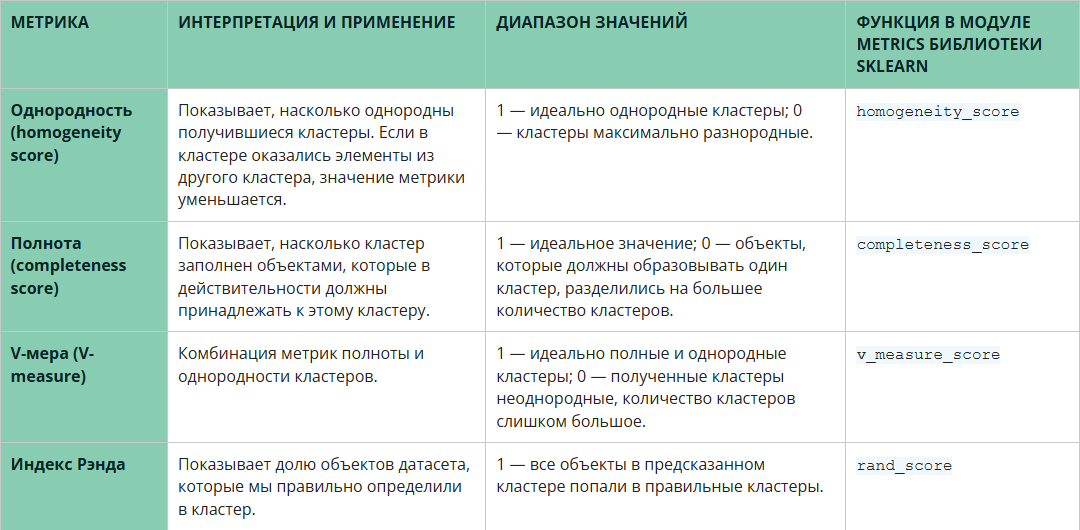

### Задание 3.1

Перед вами стоит задача разделить кластеры так, чтобы внутри каждого кластера объекты были максимально похожими. Какую метрику для оценки качества проведённой кластеризации вы будете использовать?

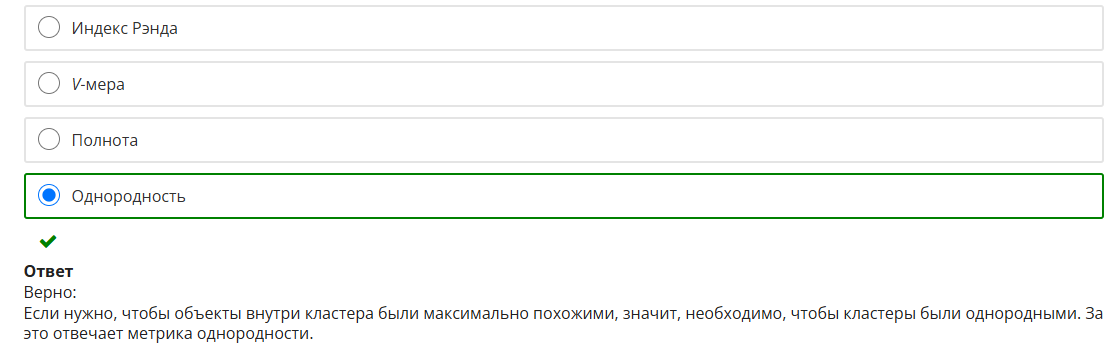

### Задание 3.2

Вы провели кластеризацию. При этом объекты, которые должны были оказаться в одном кластере, разделились на два кластера. После кластеризации вы решили посчитать метрику полноты. Будет ли она равна 1?

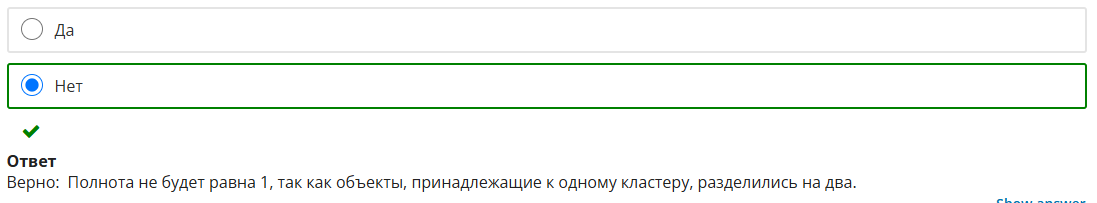

### Задание 3.3

Для пяти объектов вы провели кластеризацию k-means. Известно, что объекты должны относиться к следующим кластерам: 1, 2, 2, 1, 0. В ходе работы алгоритма вы получили следующие предсказания для каждого элемента: 1, 0, 2, 1, 2.

Рассчитайте метрику однородности полученных кластеров. Введите полученное значение, **округлив его до второго знака после точки-разделителя.**

In [21]:
print(round(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]),2))

0.74


### Задание 3.4

Если при расчёте метрики V-меры нужно придать больший вес учёту однородности кластеров, то  должна быть...

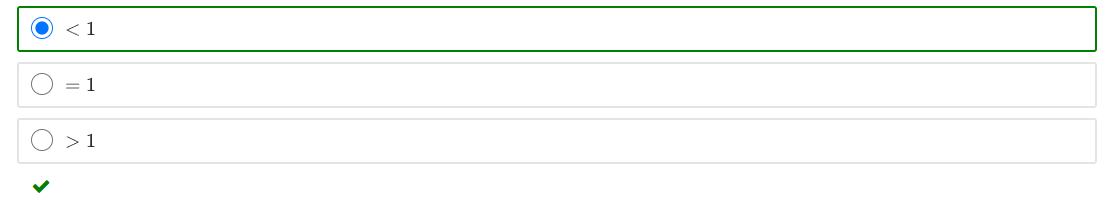

### Задание 3.5

Что показывает индекс Рэнда?

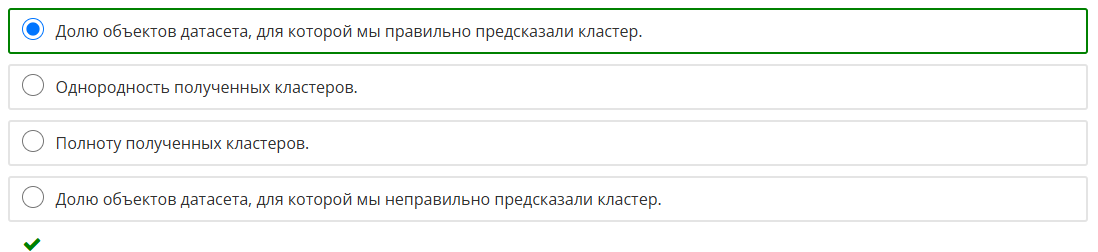